In [1]:
import itertools
try:
    import schemdraw
    import schemdraw.elements as elm
except ImportError:
    import sys
    !{sys.executable} -m pip install schemdraw
    import schemdraw
    import schemdraw.elements as elm

%config InlineBackend.figure_format = 'svg'

# IEC 60063 Standard E-Series Resistor Values
E_SERIES = {
    "E6":  [1.0, 1.5, 2.2, 3.3, 4.7, 6.8],
    "E12": [1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2],
    "E24": [1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.4, 2.7, 3.0,
            3.3, 3.6, 3.9, 4.3, 4.7, 5.1, 5.6, 6.2, 6.8, 7.5, 8.2, 9.1],
    "E48": [1.00, 1.05, 1.10, 1.15, 1.21, 1.27, 1.33, 1.40, 1.47, 1.54, 1.62, 1.69,
            1.78, 1.87, 1.96, 2.05, 2.15, 2.26, 2.37, 2.49, 2.61, 2.74, 2.87, 3.01,
            3.16, 3.32, 3.48, 3.65, 3.83, 4.02, 4.22, 4.42, 4.64, 4.87, 5.11, 5.36,
            5.62, 5.90, 6.19, 6.49, 6.81, 7.15, 7.50, 7.87, 8.25, 8.66, 9.09, 9.53],
    "E96": [1.00, 1.02, 1.05, 1.07, 1.10, 1.13, 1.15, 1.18, 1.21, 1.24, 1.27, 1.30,
            1.33, 1.37, 1.40, 1.43, 1.47, 1.50, 1.54, 1.58, 1.62, 1.65, 1.69, 1.74,
            1.78, 1.82, 1.87, 1.91, 1.96, 2.00, 2.05, 2.10, 2.15, 2.21, 2.26, 2.32,
            2.37, 2.43, 2.49, 2.55, 2.61, 2.67, 2.74, 2.80, 2.87, 2.94, 3.01, 3.09,
            3.16, 3.24, 3.32, 3.40, 3.48, 3.57, 3.65, 3.74, 3.83, 3.92, 4.02, 4.12,
            4.22, 4.32, 4.42, 4.53, 4.64, 4.75, 4.87, 4.99, 5.11, 5.23, 5.36, 5.49,
            5.62, 5.76, 5.90, 6.04, 6.19, 6.34, 6.49, 6.65, 6.81, 6.98, 7.15, 7.32,
            7.50, 7.68, 7.87, 8.06, 8.25, 8.45, 8.66, 8.87, 9.09, 9.31, 9.53, 9.76],
    "E192": [1.00, 1.01, 1.02, 1.04, 1.05, 1.06, 1.07, 1.09, 1.10, 1.11, 1.13, 1.14,
             1.15, 1.17, 1.18, 1.20, 1.21, 1.23, 1.24, 1.26, 1.27, 1.29, 1.30, 1.32,
             1.33, 1.35, 1.37, 1.38, 1.40, 1.42, 1.43, 1.45, 1.47, 1.49, 1.50, 1.52,
             1.54, 1.56, 1.58, 1.60, 1.62, 1.64, 1.65, 1.67, 1.69, 1.72, 1.74, 1.76,
             1.78, 1.80, 1.82, 1.84, 1.87, 1.89, 1.91, 1.93, 1.96, 1.98, 2.00, 2.03,
             2.05, 2.08, 2.10, 2.13, 2.15, 2.18, 2.21, 2.23, 2.26, 2.29, 2.32, 2.34,
             2.37, 2.40, 2.43, 2.46, 2.49, 2.52, 2.55, 2.58, 2.61, 2.64, 2.67, 2.71,
             2.74, 2.77, 2.80, 2.84, 2.87, 2.91, 2.94, 2.98, 3.01, 3.05, 3.09, 3.12,
             3.16, 3.20, 3.24, 3.28, 3.32, 3.36, 3.40, 3.44, 3.48, 3.52, 3.57, 3.61,
             3.65, 3.70, 3.74, 3.79, 3.83, 3.88, 3.92, 3.97, 4.02, 4.07, 4.12, 4.17,
             4.22, 4.27, 4.32, 4.37, 4.42, 4.48, 4.53, 4.59, 4.64, 4.70, 4.75, 4.81,
             4.87, 4.93, 4.99, 5.05, 5.11, 5.17, 5.23, 5.30, 5.36, 5.42, 5.49, 5.56,
             5.62, 5.69, 5.76, 5.83, 5.90, 5.97, 6.04, 6.12, 6.19, 6.26, 6.34, 6.42,
             6.49, 6.57, 6.65, 6.73, 6.81, 6.90, 6.98, 7.06, 7.15, 7.23, 7.32, 7.41,
             7.50, 7.59, 7.68, 7.77, 7.87, 7.96, 8.06, 8.16, 8.25, 8.35, 8.45, 8.56,
             8.66, 8.76, 8.87, 8.98, 9.09, 9.20, 9.31, 9.42, 9.53, 9.65, 9.76, 9.88]
}

def draw_voltage_divider_schemdraw(Vin, Vout, R1, R2):
    with schemdraw.Drawing() as d:
        d.config(unit=2.5)
        
        d += elm.Resistor().down().label(f'R1\n{R1} Ω')
        d += elm.Dot()  # Vout tap
        d.push()
        

        
        #d += elm.Line().down()
        d += elm.Resistor().down().label(f'R2\n{R2} Ω')
        d += elm.Line().left()
        d += elm.Ground()
        d += elm.SourceV().up().label(f'{Vin} V')
        d += elm.Line().up()
        d += elm.Line().right()
        
        d.pop()
        elm.Line().right().label(f'Vout ≈ {Vout:.3f} V', loc='right')

        d.draw()

def find_voltage_divider(Vin, Vout, series="E24", decades=(1, 10, 100, 1000)):
    if Vin <= 0 or Vout <= 0:
        raise ValueError("Voltages must be positive numbers.")
    if Vout >= Vin:
        raise ValueError("Output voltage must be less than input voltage.")

    target_ratio = Vout / Vin

    if series == "ALL":
        series_to_search = E_SERIES.keys()
    else:
        if series not in E_SERIES:
            raise ValueError(f"Invalid series. Choose from {list(E_SERIES.keys())} or 'ALL'")
        series_to_search = [series]

    best_pair = None
    min_error = float('inf')
    best_series = None

    for s in series_to_search:
        base_values = E_SERIES[s]
        resistors = [round(val * d, 2) for d in decades for val in base_values]

        for R1, R2 in itertools.product(resistors, repeat=2):
            if R1 + R2 == 0:
                continue
            ratio = R2 / (R1 + R2)
            error = abs(ratio - target_ratio)
            if error < min_error:
                min_error = error
                best_pair = (R1, R2, ratio, error)
                best_series = s

    return {
        "best_series": best_series,
        "R1": best_pair[0],
        "R2": best_pair[1],
        "ratio": best_pair[2],
        "error": ((best_pair[2]*Vin-Vout)/Vout),
        "Vout_calculated": best_pair[2] * Vin
    }

def generate_resistor_values(series='E24', min_decade=1, max_decade=1_000_000_000):
    base_series = []
    if series == "ALL":
        for s in E_SERIES:
            base_series.extend(E_SERIES[s])
    else:
        base_series = E_SERIES[series]

    resistor_values = set()
    for decade in range(0, 9):  # Covers 1Ω to 1000MΩ
        multiplier = 10 ** decade
        for val in base_series:
            r = round(val * multiplier, 2)
            if min_decade <= r <= max_decade:
                resistor_values.add(r)
    return sorted(resistor_values)

def find_best_combinations_series_parallel(target_resistance, series='E24', top_n=3):
    candidates = generate_resistor_values(series)
    parallel_results = []
    series_results = []

    for R1, R2 in itertools.combinations_with_replacement(candidates, 2):
        # Parallel
        R_parallel = (R1 * R2) / (R1 + R2)
        error_parallel = abs(R_parallel - target_resistance)
        parallel_results.append({
            'type': 'parallel',
            'R1': R1,
            'R2': R2,
            'R_combined': round(R_parallel, 4),
            'error': round(error_parallel, 5),
            'error_percent': round(error_parallel / target_resistance * 100, 5)
        })

        # Series
        R_series = R1 + R2
        error_series = abs(R_series - target_resistance)
        series_results.append({
            'type': 'series',
            'R1': R1,
            'R2': R2,
            'R_combined': round(R_series, 4),
            'error': round(error_series, 5),
            'error_percent': round(error_series / target_resistance * 100, 5)
        })

    # Sort and take top N
    top_parallel = sorted(parallel_results, key=lambda x: x['error'])[:top_n]
    top_series = sorted(series_results, key=lambda x: x['error'])[:top_n]

    return top_parallel + top_series

# Simple Voltage Divider

Using series: E24
R1 = 13.0 Ω, R2 = 1.6 Ω
Calculated Vout = 1.315 V
Ratio = 0.109589041, Error = -0.4 %


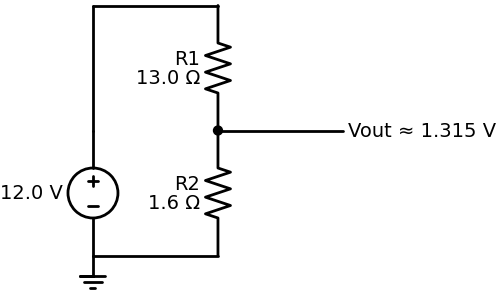

In [2]:
Vin = 12.0
Vout = 1.32
series = "E24"  # "ALL", "E12", "E24", etc.

result = find_voltage_divider(Vin, Vout, series)

print(f"Using series: {result['best_series']}")
print(f"R1 = {result['R1']} Ω, R2 = {result['R2']} Ω")
print(f"Calculated Vout = {result['Vout_calculated']:.3f} V")
print(f"Ratio = {result['ratio']:.9f}, Error = {result['error']*100:.1f} %")

draw_voltage_divider_schemdraw(
    Vin=Vin,
    Vout=result["Vout_calculated"],
    R1=result["R1"],
    R2=result["R2"]
)




# Two Resistors in Parallel / Series

In [3]:
target = 1.378e3  # Desired resistance in ohms
series = "E48"  # "ALL", "E12", "E24", etc.

results = find_best_combinations_series_parallel(target, series)

for i, res in enumerate(results, 1):
    print(f"{i}. Type: {res['type'].capitalize()} | R1 = {res['R1']} Ω, R2 = {res['R2']} Ω "
          f"-> Combined = {res['R_combined']} Ω | Error = {res['error']} Ω ({res['error_percent']} %)")

1. Type: Parallel | R1 = 1960.0 Ω, R2 = 4640.0 Ω -> Combined = 1377.9394 Ω | Error = 0.06061 Ω (0.0044 %)
2. Type: Parallel | R1 = 1400.0 Ω, R2 = 86600.0 Ω -> Combined = 1377.7273 Ω | Error = 0.27273 Ω (0.01979 %)
3. Type: Parallel | R1 = 1400.0 Ω, R2 = 90900.0 Ω -> Combined = 1378.7649 Ω | Error = 0.7649 Ω (0.05551 %)
4. Type: Series | R1 = 48.7 Ω, R2 = 1330.0 Ω -> Combined = 1378.7 Ω | Error = 0.7 Ω (0.0508 %)
5. Type: Series | R1 = 169.0 Ω, R2 = 1210.0 Ω -> Combined = 1379.0 Ω | Error = 1.0 Ω (0.07257 %)
6. Type: Series | R1 = 511.0 Ω, R2 = 866.0 Ω -> Combined = 1377.0 Ω | Error = 1.0 Ω (0.07257 %)
